In [38]:
%matplotlib inline


# Blocked reduction operations

When gridding data that has been highly oversampled in a direction (shipborne
and airborne data, for example), it is important to decimate the data before
interpolation to avoid aliasing. Class :func:`verde.BlockReduce` decimates
data by applying a reduction operation (mean, median, mode, max, etc) to the
data in blocks. For non-smooth data, like bathymetry, a blocked median filter
is a good choice.


Original data size: 82970
Decimated data size: 1801


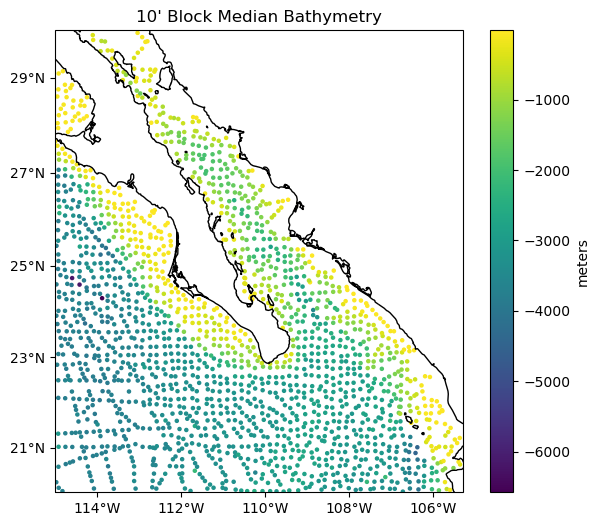

In [45]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import verde as vd

# We'll test this on the Baja California shipborne bathymetry data
data = vd.datasets.fetch_baja_bathymetry()

# Decimate the data using a blocked median with 10 arc-minute blocks
reducer = vd.BlockReduce(reduction=np.median, spacing=10 / 60)
coordinates, bathymetry = reducer.filter(
    (data.longitude, data.latitude), data.bathymetry_m
)
lon, lat = coordinates

print("Original data size:", data.bathymetry_m.size)
print("Decimated data size:", bathymetry.size)

# Make a plot of the decimated data using Cartopy
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_title("10' Block Median Bathymetry")
# Plot the bathymetry as colored circles.
plt.scatter(lon, lat, c=bathymetry, s=5, transform=ccrs.PlateCarree())
plt.colorbar().set_label("meters")
# Use a utility function to setup the tick labels and land feature
vd.datasets.setup_baja_bathymetry_map(ax)
plt.show()

### Now try on MY repeat line data ###

In [46]:
import pickle
import pandas as pd

In [49]:

# read in my sample repeat line data  
my_data = pd.read_pickle("..\sample_data.pkl")
my_data



,X,Y,MyData
0,-12665.374410365708,933386.9796040689,124.0
1,-12683.389222506026,933398.5584159876,130.0
2,-12696.264661501336,933374.5154301911,121.0
3,-12712.032044659107,933390.707884253,147.0
4,-12712.149558466568,933386.7791438933,123.0
...,...,...,...
162146,19794.35016473563,968196.6444372552,95.0
162147,19794.708267074835,968199.1015908709,75.0
162148,19794.84404243098,968198.6266911526,106.0
162149,19795.05211779388,968200.3282589433,98.0


In [50]:
# Decimate MY SAMPLE data using a blocked median with 100 METRE blocks
reducer2 = vd.BlockReduce(reduction=np.median, spacing=100)
coordinates2, MyData_blockReduced = reducer2.filter(
    (my_data.X, my_data.Y), my_data.MyData
)

TypeError: unsupported operand type(s) for -: 'str' and 'str'